# Import and clean data

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('drive/MyDrive/StudentsPerformance.csv') # import data from csv into dataframe

df.head() # look at data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [58]:
for col in df.iloc[:,:5]:
  print(df[col].unique()) # find unique values in the first 5 columns

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [59]:
df['gender'] = df['gender'].apply(lambda x: 0 if x =='female' else 1) # change gender column to binary 0 for female, 1 for male for analysis
df['lunch'] = df['lunch'].apply(lambda x: 0 if x == 'free/reduced' else 1) # change lunch column to binary 0 for free/reduced, 1 for standard
df['test preparation course'] = df['test preparation course'].apply(lambda x: 0 if x == 'none' else 1) # change test prep column to binary 0 for none, 1 for completed
df['total score'] = (df['math score'] + df['reading score'] + df['writing score']) # add a total score for analysis

In [60]:
df.info() # check data types and non-null counts, looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   int64 
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   int64 
 4   test preparation course      1000 non-null   int64 
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   total score                  1000 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 70.4+ KB


# Data Exploration and Visualization

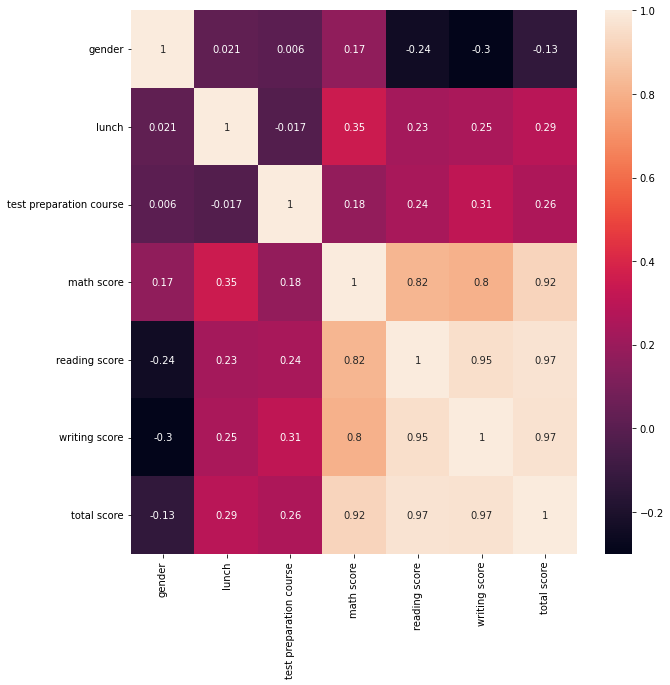

In [67]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True);

**Points of interest from heatmap**
*   Females tend to score better, aside from math, than males
*   Correlations between lunch and test scores similar to test prep course completion and test scores  
> Positive relationship between standard lunch and higher test scores may indicate a relationship between household income and test performance
*   High correlation between reading and writing score, less with these and math

Let's check these values with the data






In [72]:
df.groupby(['gender']).mean()[['math score', 'reading score', 'writing score', 'total score']] # average scores are higher for the 0 gender (female) in all except math

,math score,reading score,writing score,total score
gender,,,,
0,63.633205,72.608108,72.467181,208.708494
1,68.728216,65.473029,63.311203,197.512448


In [73]:
df.groupby(['lunch']).mean()[['math score', 'reading score', 'writing score', 'total score']] # standard lunch group (1) is higher on average in all scores

,math score,reading score,writing score,total score
lunch,,,,
0,58.921127,64.653521,63.022535,186.597183
1,70.034109,71.654264,70.823256,212.511628


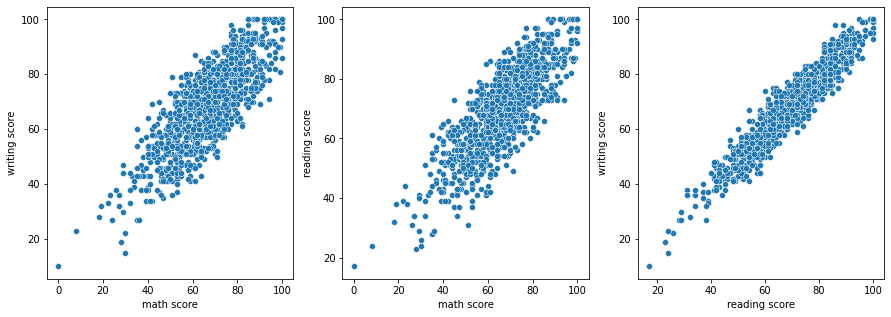

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5)) # create subplot grid of 1 row and 3 columns, shape into rectangle

sns.scatterplot(x='math score', y='writing score', data=df, ax=ax[0])
sns.scatterplot(x='math score', y='reading score', data=df, ax=ax[1])
sns.scatterplot(x='reading score', y='writing score', data=df, ax=ax[2]); # create scatter plots and assign them to the subplots created above

Notice the shape of the plots, reading and writing plot is much more condensed showing stronger correlation than when compared to math score

In [105]:
education_df = df.groupby(['parental level of education']).mean()[['math score', 'reading score', 'writing score', 'total score']].sort_values(['total score'], ascending=False) # group data by parental education and sort by total score

education_df

,math score,reading score,writing score,total score
parental level of education,,,,
master's degree,69.745763,75.372881,75.677966,220.796610
bachelor's degree,69.389831,73.000000,73.381356,215.771186
associate's degree,67.882883,70.927928,69.896396,208.707207
some college,67.128319,69.460177,68.840708,205.429204
some high school,63.497207,66.938547,64.888268,195.324022
high school,62.137755,64.704082,62.448980,189.290816


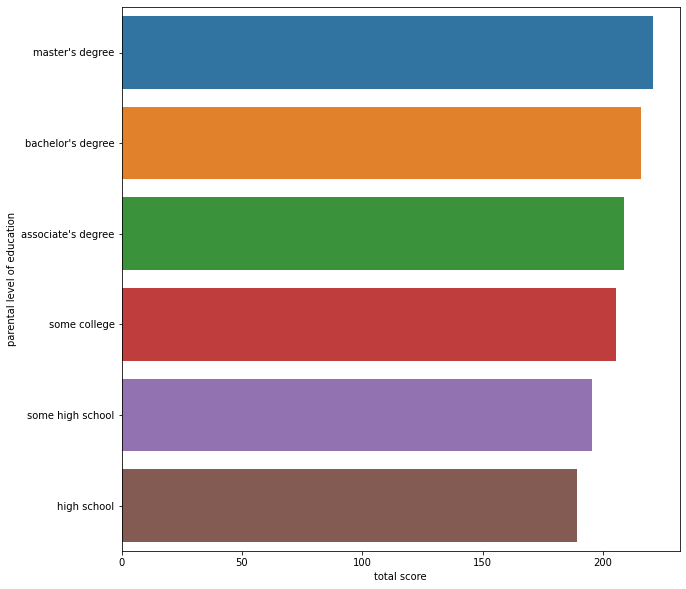

In [97]:
plt.figure(figsize=(10,10))
sns.barplot(x=education_df['total score'], y=education_df.index, orient='h'); # visualize total score and parental level of education relationship with bar plot

Interestingly, we can sort by total score and get a good sorted list of level of education. The only step which does not follow this trend is 'high school' scoring lower on average than 'some high school'